In [ ]:
#Keras and Tensorflow >2.0
#https://github.com/krishnaik06/Stock-MArket-Forecasting/blob/master/Untitled.ipynb

In [2]:
import pandas_datareader as pdr

In [5]:
df = pdr.get_data_tiingo('AAPL', api_key = '39baeb59e02c2aa470936ea12e7eed9699358c99')

In [6]:
df.to_csv('AAPL.csv')

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-04-05 00:00:00+00:00,144.02,145.4600,143.81,144.22,27717854,33.989271,34.329117,33.939710,34.036472,110871416,0.0,1.0
1,AAPL,2017-04-06 00:00:00+00:00,143.66,144.5200,143.45,144.29,21149034,33.904310,34.107273,33.854749,34.052992,84596136,0.0,1.0
2,AAPL,2017-04-07 00:00:00+00:00,143.34,144.1800,143.27,143.73,16658543,33.828788,34.027032,33.812268,33.920830,66634172,0.0,1.0
3,AAPL,2017-04-10 00:00:00+00:00,143.17,143.8792,142.90,143.60,18933397,33.788668,33.956042,33.724947,33.890149,75733588,0.0,1.0
4,AAPL,2017-04-11 00:00:00+00:00,141.63,143.3500,140.06,142.94,30379376,33.425222,33.831148,33.054696,33.734387,121517504,0.0,1.0


In [4]:
df1 = df.reset_index()['close']

In [5]:
df1

0       144.02
1       143.66
2       143.34
3       143.17
4       141.63
         ...  
1253    175.60
1254    178.96
1255    177.77
1256    174.61
1257    174.31
Name: close, Length: 1258, dtype: float64

In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-03-28 00:00:00+00:00,175.60,175.73,172.00,172.17,90371916,175.60,175.73,172.00,172.17,90371916,0.0,1.0
1254,AAPL,2022-03-29 00:00:00+00:00,178.96,179.01,176.34,176.69,100589440,178.96,179.01,176.34,176.69,100589440,0.0,1.0
1255,AAPL,2022-03-30 00:00:00+00:00,177.77,179.61,176.70,178.55,92633154,177.77,179.61,176.70,178.55,92633154,0.0,1.0
1256,AAPL,2022-03-31 00:00:00+00:00,174.61,178.03,174.40,177.84,103049285,174.61,178.03,174.40,177.84,103049285,0.0,1.0
1257,AAPL,2022-04-01 00:00:00+00:00,174.31,174.88,171.94,174.03,78751328,174.31,174.88,171.94,174.03,78751328,0.0,1.0


In [7]:
df1.shape

(1258,)

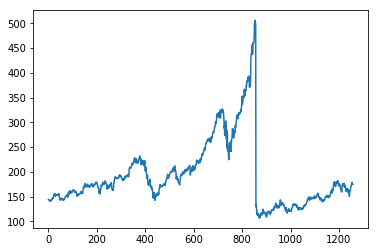

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1.shape

(1258, 1)

In [20]:
print(df1)

[[0.09312461]
 [0.09222292]
 [0.09142142]
 ...
 [0.17765811]
 [0.16974327]
 [0.16899186]]


In [13]:
#Splitting data into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size, test_size

(817, 441)

In [15]:
import numpy
#Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)


(340, 100)
(340,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
#Create stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Epoch 1/100
716/716 [==============================] - 4s 5ms/sample - loss: 4.8058e-04 - val_loss: 1.9702e-04
Epoch 2/100
716/716 [==============================] - 4s 5ms/sample - loss: 4.8584e-04 - val_loss: 1.8074e-04
Epoch 3/100
716/716 [==============================] - 4s 6ms/sample - loss: 4.8699e-04 - val_loss: 2.1470e-04
Epoch 4/100
716/716 [==============================] - 4s 6ms/sample - loss: 4.8217e-04 - val_loss: 1.8960e-04
Epoch 5/100
716/716 [==============================] - 4s 6ms/sample - loss: 4.6886e-04 - val_loss: 1.7657e-04
Epoch 6/100
716/716 [==============================] - 4s 6ms/sample - loss: 4.7749e-04 - val_loss: 1.8716e-04
Epoch 7/100
716/716 [==============================] - 4s 6ms/sample - loss: 4.8391e-04 - val_loss: 1.9074e-04
Epoch 8/100
716/716 [==============================] - 4s 6ms/sample - loss: 4.1737e-04 - val_loss: 1.7224e-04
Epoch 9/100
716/716 [==============================] - 5s 7ms/samp

Epoch 74/100
716/716 [==============================] - 4s 6ms/sample - loss: 2.8459e-04 - val_loss: 1.2710e-04
Epoch 75/100
716/716 [==============================] - 4s 6ms/sample - loss: 2.9203e-04 - val_loss: 1.1887e-04
Epoch 76/100
716/716 [==============================] - 4s 6ms/sample - loss: 2.7852e-04 - val_loss: 1.9130e-04
Epoch 77/100
716/716 [==============================] - 4s 6ms/sample - loss: 2.6495e-04 - val_loss: 1.2298e-04
Epoch 78/100
716/716 [==============================] - 4s 6ms/sample - loss: 2.7235e-04 - val_loss: 1.2922e-04
Epoch 79/100
716/716 [==============================] - 4s 6ms/sample - loss: 2.6645e-04 - val_loss: 1.6723e-04
Epoch 80/100
716/716 [==============================] - 4s 6ms/sample - loss: 2.8436e-04 - val_loss: 1.1794e-04
Epoch 81/100
716/716 [==============================] - 5s 7ms/sample - loss: 2.7043e-04 - val_loss: 1.5372e-04
Epoch 82/100
716/716 [==============================] - 4s 5ms/sample - loss: 3.0308e-04 - val_loss: 1.1

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

215.23981667599082

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

146.0896092792524

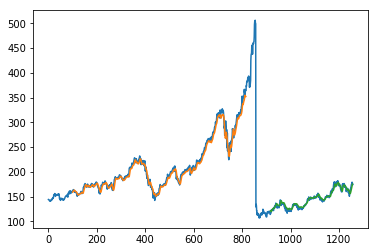

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)


441

In [36]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
len(temp_input)

100

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.1715621]
101
1 day input [0.10289292 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408
 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967
 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464
 0.16115216 0.17092048 0.16961803 0.181866   0.17257358 0.16904195
 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311
 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717
 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819
 0.17092048 0.17204759 0.1636819  0.16588604 0.15769568 0.14875391
 0.14444584 0.13918597 0.13720726 0.13259862 0.1323732  0.13119599
 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024 0.16418284
 0.16235441 0.1702943  0.17392611 0.16350657 0.15479023 0.15539136
 0.16518472 0.16458359 0.15539136 0.15143394 0.14396994 0.13332498
 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046 0.14875391
 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271 0.11994991
 0.1096556  0.1208516  0.13212273 0

11 day output [[0.16075453]]
12 day input [0.12515967 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583
 0.14647464 0.16115216 0.17092048 0.16961803 0.181866   0.17257358
 0.16904195 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566
 0.17232311 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513
 0.17715717 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181
 0.1636819  0.17092048 0.17204759 0.1636819  0.16588604 0.15769568
 0.14875391 0.14444584 0.13918597 0.13720726 0.13259862 0.1323732
 0.13119599 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024
 0.16418284 0.16235441 0.1702943  0.17392611 0.16350657 0.15479023
 0.15539136 0.16518472 0.16458359 0.15539136 0.15143394 0.14396994
 0.13332498 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046
 0.14875391 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271
 0.11994991 0.1096556  0.1208516  0.13212273 0.13470257 0.14311835
 0.14662492 0.15524108 0.1587226  0.16839073 0.17001879 0.17222292
 0.1806387  0.17765811

21 day output [[0.1550169]]
22 day input [0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217 0.17051972
 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759 0.1636819
 0.16588604 0.15769568 0.14875391 0.14444584 0.13918597 0.13720726
 0.13259862 0.1323732  0.13119599 0.15902317 0.17016907 0.16974327
 0.17282405 0.16546024 0.16418284 0.16235441 0.1702943  0.17392611
 0.16350657 0.15479023 0.15539136 0.16518472 0.16458359 0.15539136
 0.15143394 0.14396994 0.13332498 0.14001252 0.14529743 0.1459737
 0.14116468 0.14958046 0.14875391 0.14108954 0.13139637 0.12673763
 0.14053851 0.12944271 0.11994991 0.1096556  0.1208516  0.13212273
 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073
 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186
 0.17156211 0.17041811 0.16912359 0.1678696  0.16670588 0.16563621
 0.16465363 0.16375008 

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)


1258

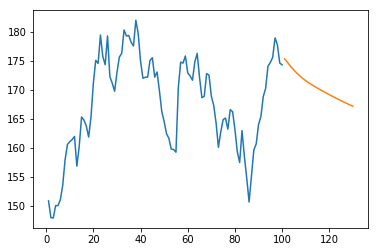

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

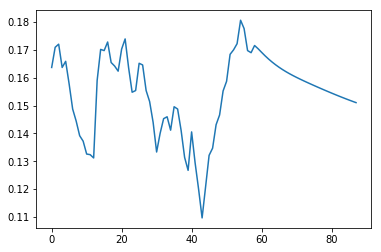

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [47]:
df3=scaler.inverse_transform(df3).tolist()


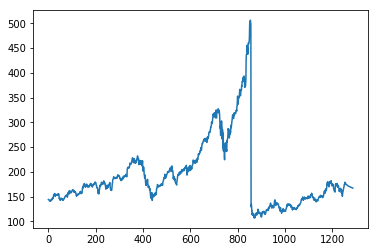

In [48]:
plt.plot(df3)
